In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/NelakurthiSudheer/Mall-Customers-Segmentation/main/Dataset/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [107]:
## Apply Kmeans algorithm to this data set
X = df[["Annual Income (k$)","Spending Score (1-100)"]]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


- 2 columns means 2 Dimension

### KMeans
************

In [108]:
from sklearn.cluster import KMeans

In [109]:
wcss1 = []
for i in range(1,15):         # test till 15 cluster
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=30)
    kmeans.fit(X)
    wcss1.append(kmeans.inertia_)     # insertia : within cluster summation of square

In [110]:
wcss1

[269981.28,
 181363.595959596,
 106348.3730621112,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 30273.39431207004,
 25311.633152958155,
 21850.16528258563,
 19641.456216651564,
 17887.08445662864,
 15990.444512350397,
 14666.175194043302,
 12797.180630643865]

### Plot KMeans 
Elbow Method

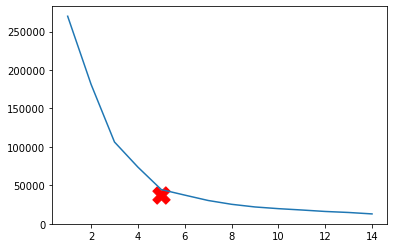

In [111]:
plt.plot(range(1,15), wcss1)
plt.scatter(5, wcss1[5], marker="X", s=300, c="r")

#### Observations:
- We can see that after 5 the line is smooth so that means k = 5 will be fine 

In [112]:
## Centroid  ## 15 centroid values
kmeans.cluster_centers_

array([[ 65.23809524,  40.14285714],
       [ 78.28571429,  90.5       ],
       [ 23.53846154,  73.53846154],
       [ 78.5       ,  10.66666667],
       [ 24.58333333,   9.58333333],
       [100.875     ,  84.25      ],
       [124.        ,  17.5       ],
       [ 28.18181818,  33.27272727],
       [127.66666667,  78.66666667],
       [ 44.86666667,  51.83333333],
       [ 59.64705882,  52.29411765],
       [ 77.78571429,  73.28571429],
       [ 95.2       ,  23.7       ],
       [ 27.625     ,  90.625     ]])

In [113]:
## WCSS 
kmeans.inertia_

12797.180630643865

In [114]:
kmeans.labels_

array([ 7,  2,  4,  2,  7,  2,  4, 13,  4,  2,  4, 13,  4,  2,  4,  2,  7,
        2,  7, 13,  7,  2,  4,  2,  4, 13,  7,  2,  7, 13,  4,  2,  4, 13,
        4, 13,  4,  2,  7,  2,  7, 13,  7,  9,  7,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,  0, 10, 10,  0, 10, 10,
       10, 10, 10, 10, 10, 10,  0, 10,  0,  0, 10, 10, 10,  0, 10,  0, 10,
       10, 10, 10,  0, 10,  0,  0, 10, 10, 10,  0,  0, 10, 10,  0, 10,  0,
       10, 10,  0, 10,  1,  0, 11,  0,  1,  3, 11,  3, 11,  0, 11,  3,  1,
        3, 11,  3, 11,  3,  1,  0,  1,  3,  1,  0, 11,  3,  1,  3,  1,  3,
       11,  3,  1,  3, 11,  3, 11,  0,  1,  3,  1, 12, 11, 12,  1, 12, 11,
        3, 11,  3,  1,  3,  1,  3, 11, 12,  5, 12,  5, 12,  5, 12,  5, 12,
        5, 12,  5, 12,  5,  6,  5,  6,  8,  6,  8,  6,  8])

In [117]:
from sklearn.metrics import silhouette_score
silhouette_score(X,kmeans.labels_)

0.42004018597903964

In [118]:
kmean1 = KMeans(n_clusters = 5, init = 'k-means++', random_state=30)
kmean1.fit_predict(X)

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [119]:
X['cluster_number'] = kmean1.fit_predict(X)

In [120]:
X

,Annual Income (k$),Spending Score (1-100),cluster_number
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4
...,...,...,...
195,120,79,3
196,126,28,2
197,126,74,3
198,137,18,2


### Extract all records that are in cluster_number 4

In [30]:
X[X['cluster_number'] ==4]

,Annual Income (k$),Spending Score (1-100),cluster_number
0,15,39,4
2,16,6,4
4,17,40,4
6,18,6,4
8,19,3,4
10,19,14,4
12,20,15,4
14,20,13,4
16,21,35,4
18,23,29,4


### Example 
Suppose a person's annual income is 55 and his spending score is 31, then predict in which cluster this person's record belong

In [32]:
kmean1.predict([[55,31,4]])

array([1])

- This shows that the person belong to cluster 1

### MiniBatchKMeans
------

In [33]:
from sklearn.cluster import MiniBatchKMeans
minibatchkmean = MiniBatchKMeans(n_clusters= 5 )
minibatchkmean.fit(X)

MiniBatchKMeans(n_clusters=5)

In [34]:
minibatchkmean.predict([[55,31,4]])

array([2])

### DBSCAN
***************

In [121]:
X1 = X.iloc[:,:2]

In [122]:
from sklearn.cluster import DBSCAN

In [125]:
dbscan = DBSCAN(eps=1,min_samples=3)
dbscan.fit(X1)

DBSCAN(eps=1, min_samples=3)

In [126]:
X1

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [127]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1, -1,
        0, -1, -1, -1, -1, -1,  1,  2,  2,  1,  2, -1,  2,  2, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1,  3, -1,  4, -1, -1,  3,  4,  3,  4, -1,
       -1, -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  5, -1,  5, -1,
       -1, -1,  5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

#### Note
- -1 represents the noise point or outlier

In [90]:
set(dbscan.labels_)

{-1, 0, 1, 2, 3, 4, 5}

In [93]:
X1['cluster_outliers'] = dbscan.labels_

In [98]:
X1

,Annual Income (k$),Spending Score (1-100),cluster_outliers
0,15,39,-1
1,15,81,-1
2,16,6,-1
3,16,77,-1
4,17,40,-1
...,...,...,...
195,120,79,-1
196,126,28,-1
197,126,74,-1
198,137,18,-1


In [129]:
from sklearn import metrics

In [138]:
true_label = kmeans.labels_
predicted_label = dbscan.labels_

metrics.jaccard_score(true_label,predicted_label, average='macro')

0.0

In [140]:
true_label = kmeans.labels_
predicted_label = dbscan.labels_

metrics.adjusted_rand_score(true_label, predicted_label)

-0.014503092593620873

In [104]:
metrics.silhouette_score(X,dbscan.labels_)

-0.4152514886476401

_________

*****************

###  Assignment of Kmeans [Reference link 1](https://github.com/NelakurthiSudheer/Mall-Customers-Segmentation)

In [ ]:
import dataset
k = 3,4,5,6,7
wcss/inertia_
plot it and find optimal K value
silhoutee score and dunn index

In [6]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/NelakurthiSudheer/Mall-Customers-Segmentation/main/Dataset/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


----------

## Hierarchical Clustering

In [1]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],[4, 2], [4, 4], [4, 0]])

In [2]:
clustering = AgglomerativeClustering()

In [3]:
clustering.fit(X)

AgglomerativeClustering()

In [4]:
clustering.labels_

array([1, 1, 1, 0, 0, 0], dtype=int64)

In [45]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [46]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [47]:
iris = load_iris()
X = iris.data

In [48]:
data = df[["Annual Income (k$)","Spending Score (1-100)"]]
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [49]:
X = np.array(data)
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [16]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [59]:
# setting distance_threshold=0 ensures we compute the full tree.
model1 = AgglomerativeClustering(distance_threshold=None,n_clusters=3)

In [17]:
model = model.fit(X)

In [19]:
model.labels_

array([146, 167, 156, 174, 159, 132, 102, 171, 108, 163, 172, 109, 160,
       157, 112, 118, 127, 110, 147, 145, 117, 195, 137, 178, 149, 197,
       173, 175, 152, 169, 126, 161, 128, 100, 123, 153, 111, 116, 131,
       124,  85, 196, 193,  55, 139, 141, 113, 106, 198, 138,  72, 194,
       189, 104, 170, 115, 107, 185,  84, 129,  96, 151, 142, 176, 191,
       199, 101, 192, 168, 114,  83, 177,  54, 158, 190, 187, 162,  80,
       188,  94,  95,  53, 136, 130,  56,  27, 144, 155, 103, 143, 179,
        41, 186, 181, 183, 119,  99,  26, 184,  87, 182,  92,  61,  90,
        86,  57, 154,  91, 166,  71,  77, 148,  50,  49,  76,  24,  78,
        64, 125, 180, 120, 122,  63, 105,  75,  65, 165,  38,  37,  97,
        79, 134,  93, 135,  18, 121,  89, 164,  58,  28, 133,  51,  46,
        73,  47,  60,  70,  81, 150,  39,  44,  88,  82,  74, 140,  66,
        98,  59,  35,  52,  31,  32,  45,  42,  69,  36,  17,  29,  62,
        43,  21,  15,  25,  22,  40,  30,  67,  12,  48,  20,   

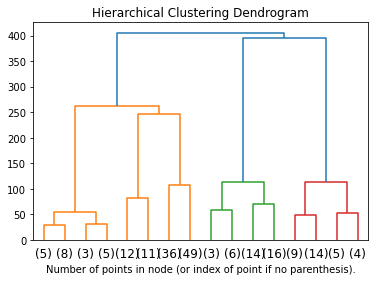

In [18]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [60]:
model1 = model1.fit(X)

In [61]:
model1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

AttributeError: 'AgglomerativeClustering' object has no attribute 'distances_'

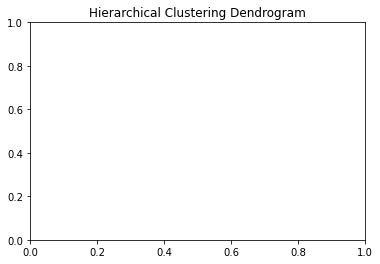

In [62]:
model1 = model1.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model1, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

********

In [63]:
from sklearn.cluster import DBSCAN
import numpy as np
X = np.array([[1, 2], [2, 2], [2, 3],
...               [8, 7], [8, 8], [25, 80]])

In [64]:
clustering = DBSCAN(eps=3, min_samples=2)

In [ ]:
clustering.fit(X)